In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader as web
import datetime
import pandas as pd
import numpy as np



from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

from farhad.time_estimate import EstimateFaster
from farhad.StockTalent import normalize_df, Normlize_nMonth


In [3]:
df_data = pd.read_csv('data/tesla1000_topic_models.csv')
df_data.head()

,created_at,text,label_topicModels
0,2011-07-19,difference going stellar marketp,1
1,2013-01-02,get limitations compared tesla os pressuring a...,0
2,2012-05-08,grandote asi sincero como los que da mi gato t...,0
3,2014-10-25,fine win take money,1
4,2012-05-01,tesla model versus giant snow drift highway video,1


In [5]:
df_data.sort_values('created_at').head()

,created_at,text,label_topicModels
986,2007-03-21,multiple sources tell amazon made clear beginn...,0
44,2007-04-10,tesla,0
412,2007-04-14,sadly hybrid wife calls old man car maybe tesl...,0
474,2007-08-09,amazon places big bet aspiring tesla rival riv...,1
687,2008-02-07,thanks,0


In [2]:
start = datetime.datetime(2011,1,1)
end = datetime.datetime(2019,2,14)
#style.use('ggplot')
pakage_price= web.DataReader('TSLA','yahoo', start,end) 
pakage_price.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,27.000000,25.900000,26.84,26.620001,1283000,26.620001
2011-01-04,26.950001,26.020000,26.66,26.670000,1187400,26.670000
2011-01-05,26.900000,26.190001,26.48,26.830000,1446700,26.830000
2011-01-06,28.000000,26.809999,26.83,27.879999,2061200,27.879999
2011-01-07,28.580000,27.900000,28.00,28.240000,2247900,28.240000


In [45]:
pakage_price["Date"] = pakage_price.index
pakage_price.to_csv("data/stock_price_tesla_from2007.csv",index=False)

In [74]:
df_price = pd.read_csv("data/stock_price_tesla_from2007.csv")
df_price.head(2)

,High,Low,Open,Close,Volume,Adj Close,Date
0,27.000000,25.90,26.84,26.620001,1283000,26.620001,2011-01-03
1,26.950001,26.02,26.66,26.670000,1187400,26.670000,2011-01-04


In [48]:
#df_price['month'] = df_price['Date'].apply(lambda x: datetime.datetime.strptime(str(x),"%Y-%m-%d").month)

In [82]:
df_price['norm_Adj_price'],std_list  = Normlize_nMonth(90 , df_price, Date="Date", price="Adj Close")
df_price.head(2)

[22/90][time]*** Done! ***


,High,Low,Open,Close,Volume,Adj Close,Date,norm_Adj_price
0,27.000000,25.90,26.84,26.620001,1283000,26.620001,2011-01-03,-0.260579
1,26.950001,26.02,26.66,26.670000,1187400,26.670000,2011-01-04,0.172582


0.25


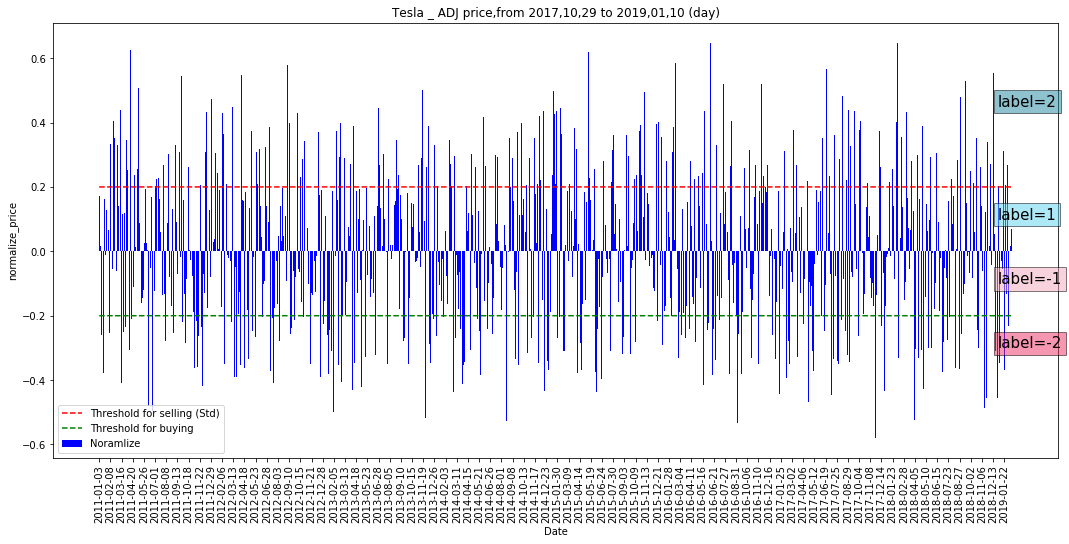

In [92]:
std = round(df_price["norm_Adj_price"].std(),2)
print(std)
line1 = [0.2 for i in range(len(df_price))]
line2 = [-0.2 for i in range(len(df_price))]

plt.figure(figsize=(18,8))
plt.bar(df_price['Date'] , df_price["norm_Adj_price"], color='b', label='Noramlize')
plt.plot(df_price['Date'],line1,'r--', label='Threshold for selling (Std)')
plt.plot(df_price['Date'],line2,'g--',label='Threshold for buying')
plt.title('Tesla _ ADJ price,from 2017,10,29 to 2019,01,10 (day)')

plt.xticks(df_price['Date'][::25] ,rotation=90)
plt.ylabel('normalize_price')
plt.xlabel('Date')
plt.legend()

plt.text(2010,0.45, r'label=2',size=15,bbox=dict(facecolor='#2087A1', alpha=0.5))
plt.text(2010,0.1, r'label=1',size=15,bbox=dict(facecolor='#5CD3F0', alpha=0.5))
plt.text(2010,-0.1, r'label=-1',size=15,bbox=dict(facecolor='#F2A9BD', alpha=0.5))
plt.text(2010,-0.3, r'label=-2',size=15,bbox=dict(facecolor='#EF2E62', alpha=0.5))

plt.show()

0.25


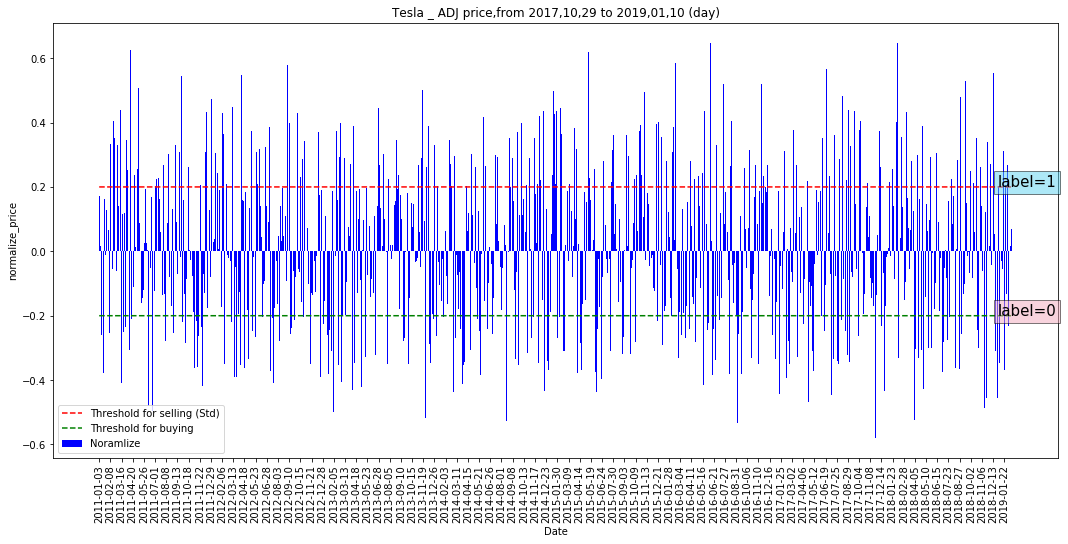

In [94]:
std = round(df_price["norm_Adj_price"].std(),2)
print(std)
line1 = [0.2 for i in range(len(df_price))]
line2 = [-0.2 for i in range(len(df_price))]

plt.figure(figsize=(18,8))
plt.bar(df_price['Date'] , df_price["norm_Adj_price"], color='b', label='Noramlize')
plt.plot(df_price['Date'],line1,'r--', label='Threshold for selling (Std)')
plt.plot(df_price['Date'],line2,'g--',label='Threshold for buying')
plt.title('Tesla _ ADJ price,from 2017,10,29 to 2019,01,10 (day)')

plt.xticks(df_price['Date'][::25] ,rotation=90)
plt.ylabel('normalize_price')
plt.xlabel('Date')
plt.legend()

#plt.text(2010,0.45, r'label=2',size=15,bbox=dict(facecolor='#2087A1', alpha=0.5))
plt.text(2010,0.2, r'label=1',size=15,bbox=dict(facecolor='#5CD3F0', alpha=0.5))
plt.text(2010,-0.2, r'label=0',size=15,bbox=dict(facecolor='#F2A9BD', alpha=0.5))
#plt.text(2010,-0.3, r'label=-2',size=15,bbox=dict(facecolor='#EF2E62', alpha=0.5))

plt.show()

In [97]:
def Give_lebal_according_price(x):
    if x>=0.2:
        y=2
    elif x>=0:
        y=1
    elif x<0:
        y=-1
    elif x<=-0.2:
        y=-2
    return y
df_price["Price_label"] = df_price["norm_Adj_price"].apply(Give_lebal_according_price)

In [98]:
df_price.head()

,High,Low,Open,Close,Volume,Adj Close,Date,norm_Adj_price,Price_label
0,27.000000,25.900000,26.84,26.620001,1283000,26.620001,2011-01-03,-0.260579,-1
1,26.950001,26.020000,26.66,26.670000,1187400,26.670000,2011-01-04,0.172582,1
2,26.900000,26.190001,26.48,26.830000,1446700,26.830000,2011-01-05,-0.071891,-1
3,28.000000,26.809999,26.83,27.879999,2061200,27.879999,2011-01-06,0.015073,1
4,28.580000,27.900000,28.00,28.240000,2247900,28.240000,2011-01-07,0.093645,1


In [100]:
df_price2 = df_price[['Date','norm_Adj_price','Price_label']]

In [ ]:
df_price2.to_csv('data/price_tesla_with_label.csv',index=False)

In [99]:
df_data = pd.read_csv('data/tesla1000_topic_models.csv')
df_data.head()

,created_at,text,label_topicModels
0,2011-07-19,difference going stellar marketp,1
1,2013-01-02,get limitations compared tesla os pressuring a...,0
2,2012-05-08,grandote asi sincero como los que da mi gato t...,0
3,2014-10-25,fine win take money,1
4,2012-05-01,tesla model versus giant snow drift highway video,1


In [180]:
df_data = df_data.sort_values('created_at')

In [181]:
df_data.head()

,created_at,text,label_topicModels
986,2007-03-21,multiple sources tell amazon made clear beginn...,0
44,2007-04-10,tesla,0
412,2007-04-14,sadly hybrid wife calls old man car maybe tesl...,0
474,2007-08-09,amazon places big bet aspiring tesla rival riv...,1
687,2008-02-07,thanks,0


In [182]:
df_price.head()

,High,Low,Open,Close,Volume,Adj Close,Date,norm_Adj_price,Price_label
0,27.000000,25.900000,26.84,26.620001,1283000,26.620001,2011-01-03,-0.260579,-1
1,26.950001,26.020000,26.66,26.670000,1187400,26.670000,2011-01-04,0.172582,1
2,26.900000,26.190001,26.48,26.830000,1446700,26.830000,2011-01-05,-0.071891,-1
3,28.000000,26.809999,26.83,27.879999,2061200,27.879999,2011-01-06,0.015073,1
4,28.580000,27.900000,28.00,28.240000,2247900,28.240000,2011-01-07,0.093645,1


In [116]:
df_data = df_data.sort_values('created_at')

In [117]:
new_df = pd.merge(left=df_data, left_on='created_at', right=df_price2, right_on='Date')
new_df = new_df[['created_at','text','label_topicModels','Price_label']]


In [122]:
new_df.head()

,created_at,text,label_topicModels,Price_label,"Price_label(0,1)"
0,2011-01-18,watch slammed suv blowing red light mph miami ...,0,-1,0
1,2011-01-19,tesla xyecla,0,-1,0
2,2011-01-21,yep tesla going take world structurally unprofi,0,2,1
3,2011-02-01,introducing dog mode set cabin temperature kee...,1,1,1
4,2011-02-11,wheeled electricvehicle company could next tes...,0,-1,0


In [151]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 593 entries, 0 to 592
Data columns (total 5 columns):
created_at           593 non-null object
text                 562 non-null object
label_topicModels    593 non-null int64
Price_label          593 non-null int64
Price_label(0,1)     593 non-null int64
dtypes: int64(3), object(2)
memory usage: 27.8+ KB


In [137]:
def label_price_small(x):
    if x>0:
        y=1
    if x<0:
        y=-1
    return y
def label_topic(x):
    if x==1:
        y=-1
    if x==-1:
        y=1
    return y
new_df['Price_label(0,1)'] = new_df['Price_label'].apply(label_price_small)
new_df['label_topicModels'] = new_df['label_topicModels'].apply(label_topic)


new_df = new_df.sort_values('created_at')

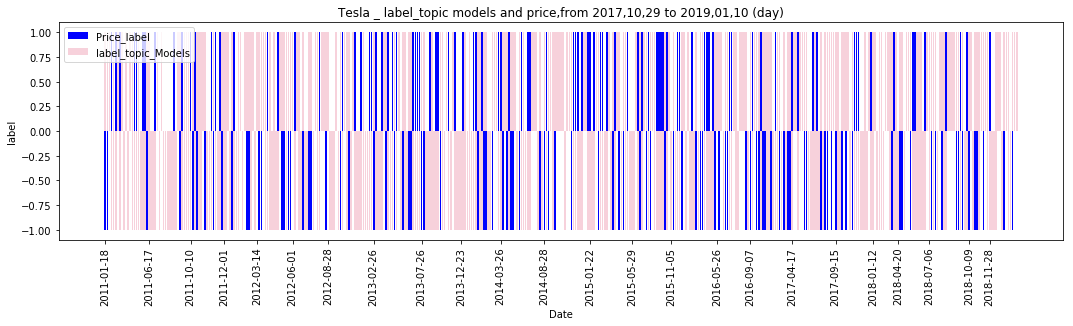

In [138]:
plt.figure(figsize=(18,4))
plt.bar(new_df['created_at'] , new_df['Price_label(0,1)'], color='b', label='Price_label')
plt.bar(new_df['created_at'],new_df['label_topicModels'],color='#F7D1DB', label='label_topic_Models')

plt.title('Tesla _ label_topic models and price,from 2017,10,29 to 2019,01,10 (day)')
plt.xticks(new_df['created_at'][::25] ,rotation=90)
plt.ylabel('label')
plt.xlabel('Date')
plt.legend()
plt.savefig('fo.png')
plt.show()

In [171]:
def label_price_small(x):
    if x>0:
        y=1
    if x<0:
        y=0
    return y
def label_topic(x):
    if x==0:
        y=1
    if x==1:
        y=0
    return y
new_df['Price_label(0,1)'] = new_df['Price_label'].apply(label_price_small)
new_df['label_topicModels'] = new_df['label_topicModels'].apply(label_topic)


new_df = new_df.sort_values('created_at')

In [172]:
from tensorflow.keras.metrics import binary_crossentropy
#x = binary_crossentropy(new_df['Price_label(0,1)'],new_df['label_topicModels'])

In [173]:
num = 0
for i in range(len(new_df['Price_label(0,1)'])):
    x = new_df['Price_label(0,1)'][i]- new_df['label_topicModels'][i]
    if x!=0 :
        num+=1
                    
        

In [174]:
num

296

In [175]:
len(new_df)

593

In [183]:
new_df.to_csv('data/tesla_label_twoprice_andtopic.csv',index=False)